# PREPARING THE DATA

### Importing and Displaying the Dataset

In [84]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Reading a CSV file containing housing price data into a Pandas DataFrame
house_data = pd.read_csv('housing_price1.csv')

# Displaying the first few rows of the DataFrame to inspect the data
house_data.head(10)


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
6,2724,2,1,Suburb,1993,343429.319110
7,2044,4,3,Rural,1957,184992.321268
8,2638,4,3,Urban,1959,377998.588152
9,1121,5,2,Urban,2004,95961.926014


### Checking Properties of the Dataset

In [11]:
# Checking the number of rows and columns of the DataFrame
house_data.shape


(50000, 6)

In [13]:
# Displaying concise information about the DataFrame, including data types and memory usage
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In summary, the DataFrame represents housing-related data with information on square footage, bedrooms, bathrooms, neighborhood names, the year properties were built, and their corresponding prices. The data types are appropriate for each column, and there are no missing values in any column.








### Checking for Duplicate rows in the Dataset

In [51]:
# Identifying and storing duplicate rows in the 'house_data' DataFrame
duplicates = house_data.duplicated()

# Flag to check if any duplicates are found
found_duplicates = False

# Looping through the DataFrame to print rows where duplicates are True
for index, is_duplicate in house_data.iterrows():
    if duplicates[index]:
        print(house_data.loc[index])
        found_duplicates = True

# Handling the case when no duplicates are found
if not found_duplicates:
    print("No duplicates found.")


No duplicates found.


### Checking for Distinct Values in each columns

In [19]:
# Define a function to get the distinct values of a column using the unique method
def get_distinct_values(column):
    return column.unique()

# Apply the get_distinct_values function to each column of the 'house_data' DataFrame
distinct_values_per_column = house_data.apply(get_distinct_values)

# Display the resulting DataFrame, where each column contains an array of distinct values for that column
distinct_values_per_column


SquareFeet      [2126, 2459, 1860, 2294, 2130, 2095, 2724, 204...
Bedrooms                                             [4, 3, 2, 5]
Bathrooms                                               [1, 2, 3]
Neighborhood                               [Rural, Suburb, Urban]
YearBuilt       [1969, 1980, 1970, 1996, 2001, 2020, 1993, 195...
Price           [215355.28361820136, 195014.22162584803, 30689...
dtype: object

# ANALYZING THE DATA

### Checking some basic statistics of the Dataset

In [21]:
# Displaying descriptive statistics of the 'house_data' DataFrame
house_data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


### Getting the coefficient of variation of the numeric columns

In [40]:
# Select numeric columns from the 'house_data' DataFrame
numeric_columns = house_data.select_dtypes(include=['number'])

# Calculate the coefficient of variation for each numeric column
# Coefficient of variation (CV) is the ratio of the standard deviation to the mean, expressed as a percentage
cv_per_column = (numeric_columns.std() / numeric_columns.mean()) * 100

# Display the result: Coefficient of Variation for each numeric column
print("Coefficient of Variation for Each Numeric Column:")
print(cv_per_column)


Coefficient of Variation for Each Numeric Column:
SquareFeet    28.684236
Bedrooms      31.906873
Bathrooms     40.886163
YearBuilt      1.043585
Price         33.866810
dtype: float64


### Getting the correlation matrix for the numerical columns

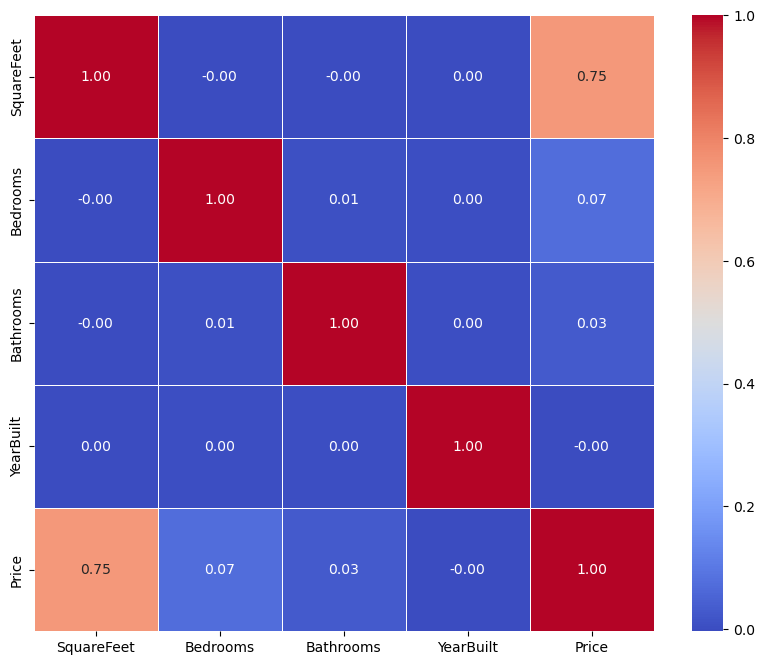

In [36]:
# Importing necessary libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns from the 'house_data' DataFrame
numeric_columns = house_data.select_dtypes(include=['number'])

# Computing the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Setting up the matplotlib figure with a specific size
plt.figure(figsize=(10, 8))

# Plotting the correlation matrix as a heatmap using seaborn
# - annot=True adds the numeric values to each cell
# - cmap='coolwarm' sets the color map
# - fmt=".2f" formats the numeric values to display two decimal places
# - linewidths=.5 adds grid lines for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Displaying the plot
plt.show()


The matrix above suggests there is a relationship between the columns 'SquareFeet' and 'Price', due of the correlation value of 0.75 (above 0.6)

### Generating a scatter plot to visualize the relationship between  'SquareFeet' and 'Price'

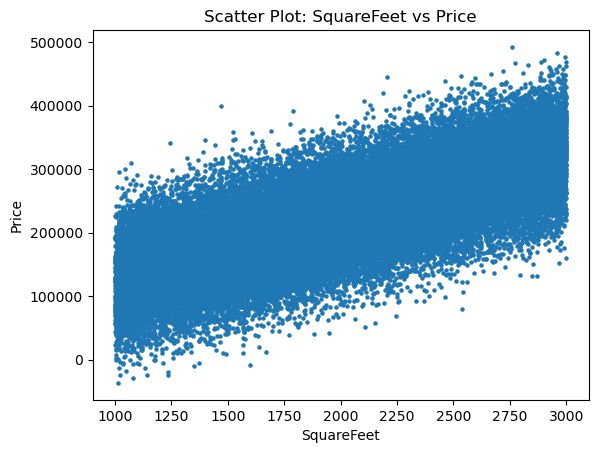

In [43]:
# Scatter plot using 'SquareFeet' for the x-axis and 'Price' for the y-axis with reduced marker size
plt.scatter(house_data['SquareFeet'], house_data['Price'], s=5)  # You can adjust the 's' parameter to change marker size

# Set axis labels
plt.xlabel('SquareFeet')
plt.ylabel('Price')

plt.title('Scatter Plot: SquareFeet vs Price')


plt.show()


### LINEAR REGRESSION

###### Using sklearn

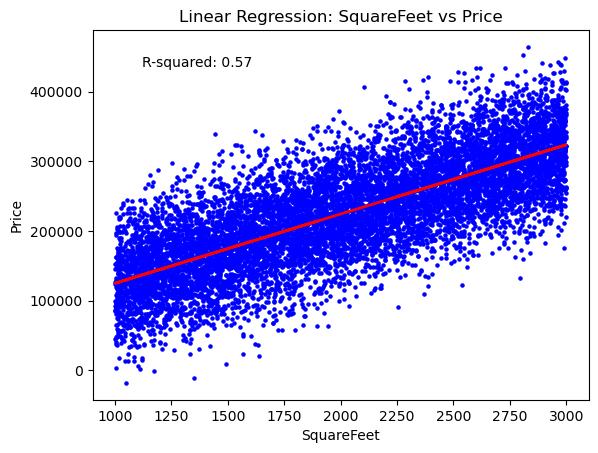

In [94]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Selecting relevant columns from the DataFrame
data = house_data[['SquareFeet', 'Price']]

# Splitting the data into features (X) and target variable (y)
X = data[['SquareFeet']]
y = data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r_squared = model.score(X_test, y_test)

# Calculate standard error
residuals = y_test - y_pred
standard_error = np.std(residuals)

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue', s=5)  # Scatter plot of the test data points
plt.plot(X_test, y_pred, color='red', linewidth=2)  # Plotting the regression line
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.title('Linear Regression: SquareFeet vs Price')

# Displaying R-squared  on the plot
plt.text(0.1, 0.9, f'R-squared: {r_squared:.2f}', transform=plt.gca().transAxes)

plt.show()


###### Using statsmodels

In [50]:
# Import the statsmodels library
import statsmodels.api as sm

# Select the relevant columns from your DataFrame 
data = house_data[['SquareFeet', 'Price']]

# Add a constant term for the intercept to the independent variable
X = sm.add_constant(data['SquareFeet'])

# Dependent variable
y = data['Price']

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                 6.457e+04
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:32:13   Log-Likelihood:            -6.1224e+05
No. Observations:               50000   AIC:                         1.224e+06
Df Residuals:                   49998   BIC:                         1.224e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.555e+04    815.878     31.316      0.0

### SUMMARY OF REGRESSION TABLE: 
###### R-squared (0.564): 
An R-squared of 0.564 indicates that approximately 56.4% of the variability in house prices can be explained by the square footage variable. It suggests a moderate level of predictive power, indicating that the model explains a significant portion of the variation in house prices, but there are other factors contributing to the remaining variability.
###### Coefficient (99.3221): 
This coefficient suggests that, on average, each additional unit of square footage is associated with an increase of 99.3221 units in the predicted house price. Therefore, larger houses, as measured by square footage, tend to have higher predicted prices.

###### A p-value of 0.00:
The p-value of 0.00 associated with the coefficient implies that the relationship between 'SquareFeet' and 'Prices' is statistically significant. In other words, there is strong evidence to reject the null hypothesis that the coefficient is equal to zero, supporting the idea that 'SquareFeet' has a significant impact on 'Prices.'

#### In summary:
This model, which explores the association between 'Square Feet' and 'Prices', reveals a moderate explanatory power with an R-squared value of 0.564. The coefficient of 99.3221 indicates that, on average, each additional unit of 'Square Feet' corresponds to an increase of 99.3221 units in 'Prices'. The extremely low p-value (0.00) suggests a highly significant relationship, providing strong evidence that 'Square Feet' is a crucial predictor of 'Prices' in the model.

However it seems there may be other factors contributing to the Price of Houses

### ADDING OTHER INDEPENDENT VARIABLES TO THE MODEL

###### adding 'Bedrooms' and 'Bathrooms' to 'SquareFeet' as Independent Variables

In [91]:
import pandas as pd
import statsmodels.api as sm


# Extracting independent variables from the dataset
independent_vars = ['SquareFeet', 'Bedrooms', 'Bathrooms']
X = house_data[independent_vars]

# Adding a constant term to the independent variables matrix
X = sm.add_constant(X)

# Extracting the dependent variable
y = house_data['Price']

# Creating and fitting the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Displaying the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 2.210e+04
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:16:39   Log-Likelihood:            -6.1186e+05
No. Observations:               50000   AIC:                         1.224e+06
Df Residuals:                   49996   BIC:                         1.224e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2073.8676   1201.569      1.726      0.0

# INFERENCE

###### Adjusted R-squared (0.570): 
The adjusted R-squared value of 0.570 indicates that approximately 57% of the variability in the dependent variable (Price) can be explained by the independent variables (SquareFeet, Bedrooms, Bathrooms) in this model.

## SquareFeet:

###### Coefficient (coef): 99.3612 - 
For every one-unit increase in Square Footage, the predicted Price increases by approximately $99.36



###### P-value: 0.00 - 
The p-value is less than the typical significance level (e.g., 0.05), suggesting that the Square Feet variable is statistically significant in predicting the Price.

## Bedrooms:

##### Coefficient (coef): 5073.3205 -
For every one-unit increase in the number of Bedrooms, the predicted Price increases by approximately $5,073.32.



###### P-value: 0.00 - 
The low p-value suggests that the Bedrooms variable is statistically significant in predicting the Price.

## Bathrooms:

###### Coefficient (coef): 2830.2913 - 
For every one-unit increase in the number of Bathrooms, the predicted Price increases by approximately $2,830.29.

###### P-value: 0.00 - 
The low p-value indicates that the Bathrooms variable is statistically significant in predicting the Price.

# CONCLUSION
###### In summary, all three independent variables (SquareFeet, Bedrooms, Bathrooms) are statistically significant predictors of the Price, and the model, as indicated by the adjusted R-squared value, explains a substantial portion of the variability in the dependent variable. 
###### Other factors that may also influence the variability of house prices aside those accounted for in this study could include: Economic factors, market conditions, architectural style and property characteristics, demographic trends etc